## Mount Google Drive and Load Data



In [12]:
# Feature Engineering Script: Cross, Time, and Rolling Features
import pandas as pd
import numpy as np
# Mount Google Drive
from google.colab import drive
import tensorflow as tf
import os

# Mount Google Drive
drive.mount('/content/drive')


# Load data
csv_path = "/content/drive/MyDrive/auto_parts_models/auto_parts_sales_data.csv"
df = pd.read_csv(csv_path, parse_dates=["date"])

# Step 1: Time Features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week.astype(int)
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter

# Step 2: Cross Features
df['product_category'] = df['product_name'] + "_" + df['category']
df['brand_model'] = df['brand'] + "_" + df['car_model']
df['category_model'] = df['category'] + "_" + df['car_model']

# Step 3: Sort for rolling
df = df.sort_values(by=['product_name', 'date'])

# Step 4: Rolling Features (7-month and 3-month moving averages)
df['rolling_3m_units'] = (
    df.groupby('product_name')['units_sold']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

df['rolling_7m_units'] = (
    df.groupby('product_name')['units_sold']
    .transform(lambda x: x.rolling(window=7, min_periods=1).mean())
)

df['rolling_3m_revenue'] = (
    df.groupby('product_name')['revenue']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

df['rolling_7m_revenue'] = (
    df.groupby('product_name')['revenue']
    .transform(lambda x: x.rolling(window=7, min_periods=1).mean())
)

# Step 5: Fill any potential missing values
df.fillna(0, inplace=True)

# Optional: Save engineered dataset
df.to_csv("/content/drive/MyDrive/auto_parts_models/auto_parts_sales_data_enriched.csv", index=False)

print("✅ Feature engineering complete. New shape:", df.shape)


Mounted at /content/drive
✅ Feature engineering complete. New shape: (10200, 21)


In [ ]:
!pip install xgboost

##Step 2: This Python script performs automated machine learning (AutoML) tasks on an enriched auto parts sales dataset, using XGBoost for regression and Optuna for hyperparameter tuning. Here's a breakdown of its steps:
>





### 📘 What This Code Does (Summary in English):

This Python script performs **automated machine learning (AutoML)** tasks on an enriched auto parts sales dataset, using **XGBoost** for regression and **Optuna** for hyperparameter tuning. Here's a breakdown of its steps:

---

### 🔍 Step-by-Step Breakdown:

1. **Import Libraries**
   It imports essential libraries: `pandas`, `numpy`, `scikit-learn`, `xgboost`, and `optuna`.

2. **Load Data**
   It loads a cleaned and enriched CSV file containing historical auto parts sales data, including features like:

   * Product details
   * Date-based features (e.g., month, week, quarter)
   * Rolling statistics (e.g., 3-month revenue)

3. **Feature Engineering**

   * Categorical features are one-hot encoded using `ColumnTransformer`.
   * Numeric features are passed through as-is.

4. **Train-Test Split**
   The data is split into training and testing sets (80/20).

5. **Define Optuna Objective Function**
   A custom function is defined to:

   * Suggest hyperparameters.
   * Train the model using the current trial's parameters.
   * Return RMSE on the test set.

6. **Run Optuna Optimization**
   The script runs 30 Optuna trials to find the best hyperparameters that minimize RMSE (Root Mean Square Error).

7. **Train Final Model with Best Params**
   The final `XGBRegressor` is trained using the best parameters found by Optuna.

8. **Evaluate Final Model**
   It prints:

   * **RMSE** (lower is better)
   * **R² Score** (closer to 1 is better)




=== Data Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                10200 non-null  datetime64[ns]
 1   product_id          10200 non-null  object        
 2   product_name        10200 non-null  object        
 3   category            10200 non-null  object        
 4   brand               10200 non-null  object        
 5   car_model           10200 non-null  object        
 6   unit_price          10200 non-null  float64       
 7   units_sold          10200 non-null  int64         
 8   revenue             10200 non-null  float64       
 9   year                10200 non-null  int64         
 10  month               10200 non-null  int64         
 11  week                10200 non-null  int64         
 12  dayofweek           10200 non-null  int64         
 13  quarter             1020

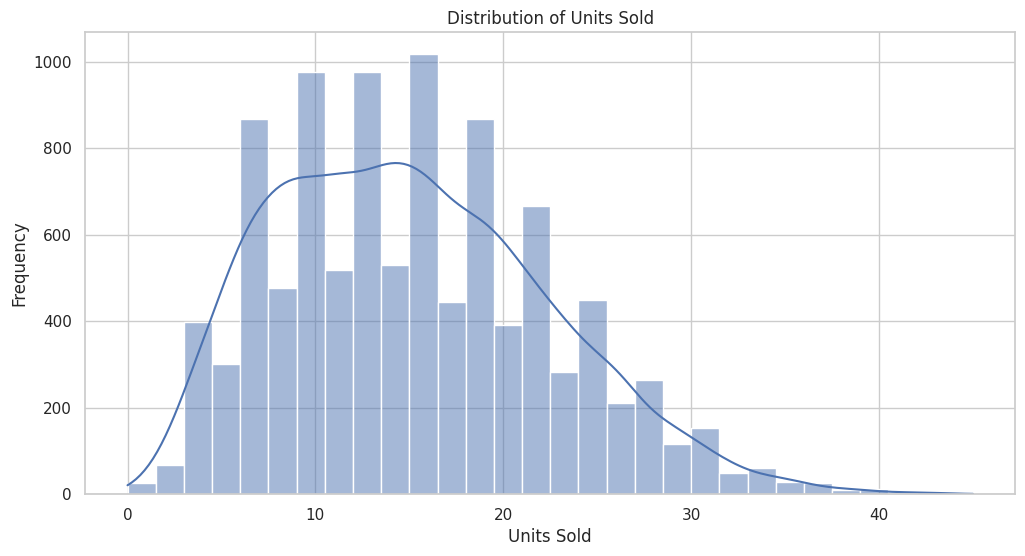

/tmp/ipython-input-28-654033671.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')


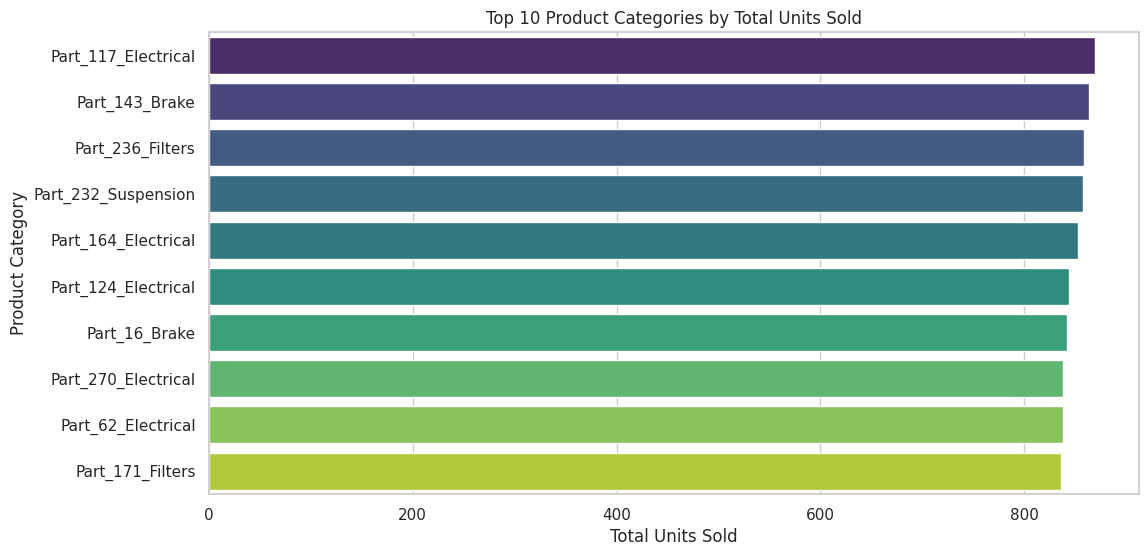

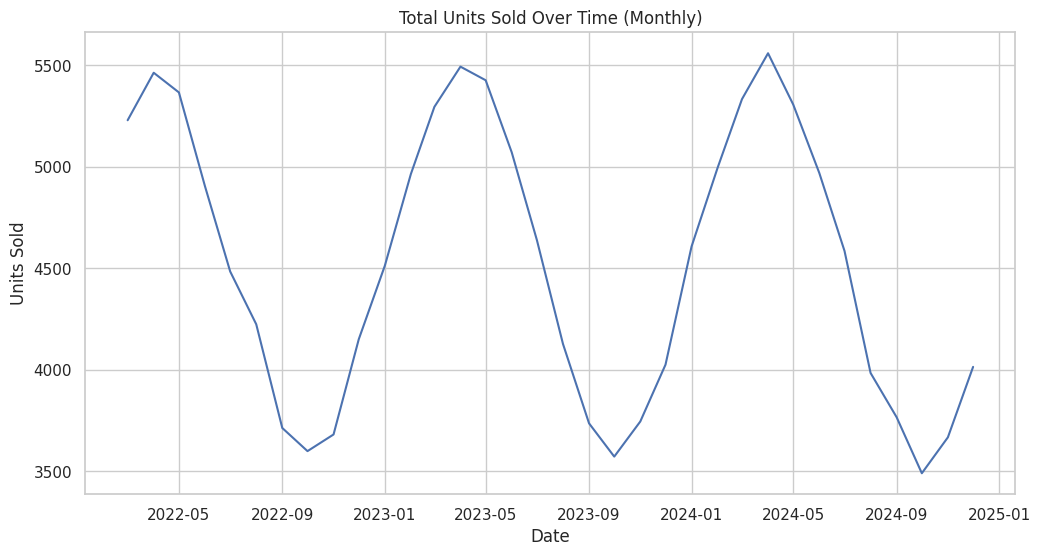

/tmp/ipython-input-28-654033671.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_brand.values, y=avg_price_brand.index, palette='coolwarm')


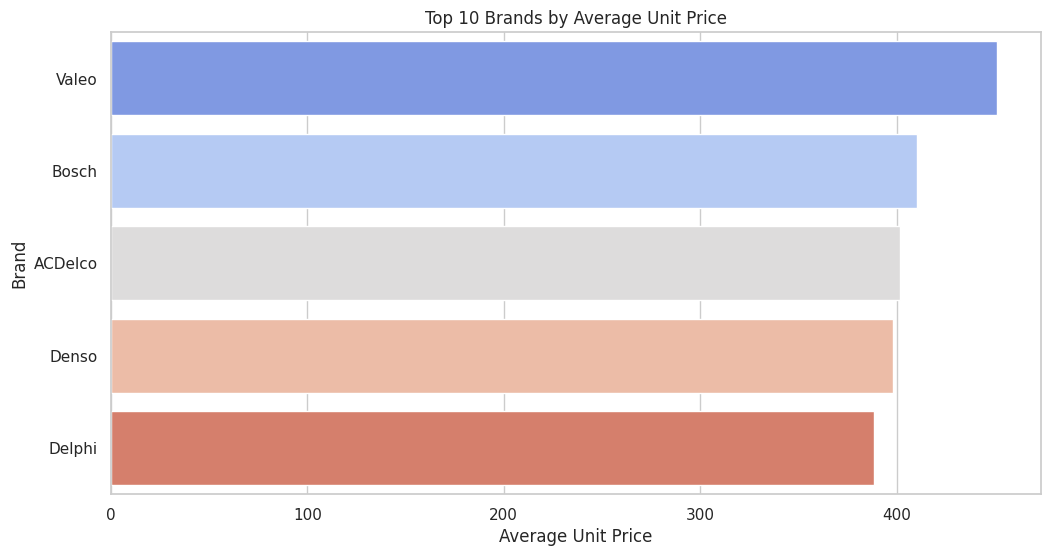

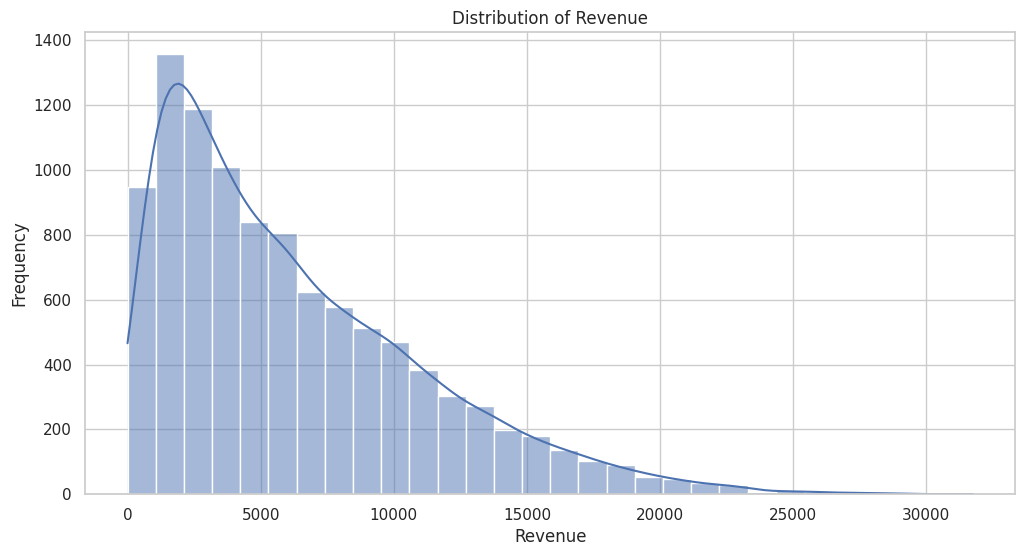

/tmp/ipython-input-28-654033671.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=car_model_sales.values, y=car_model_sales.index, palette='magma')


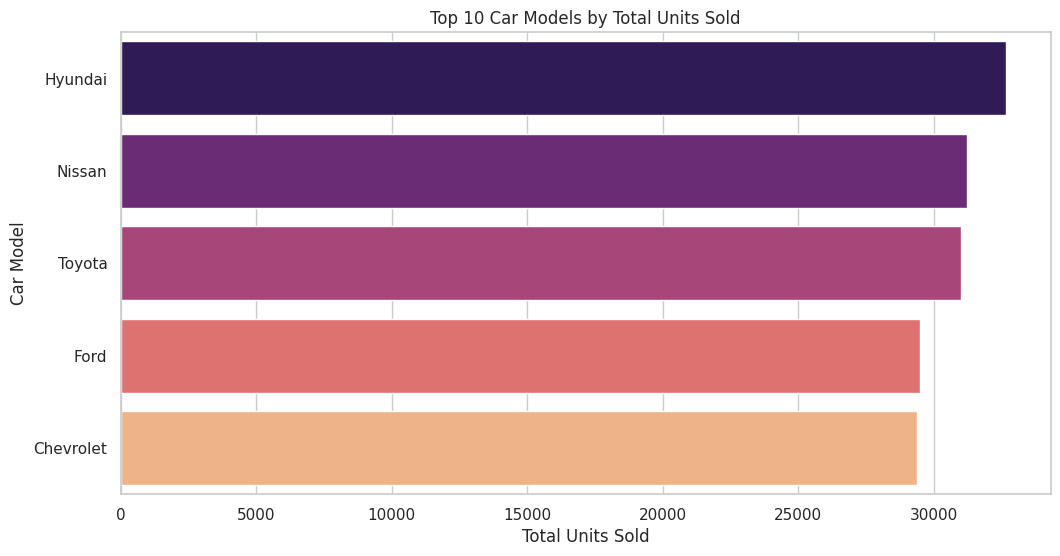

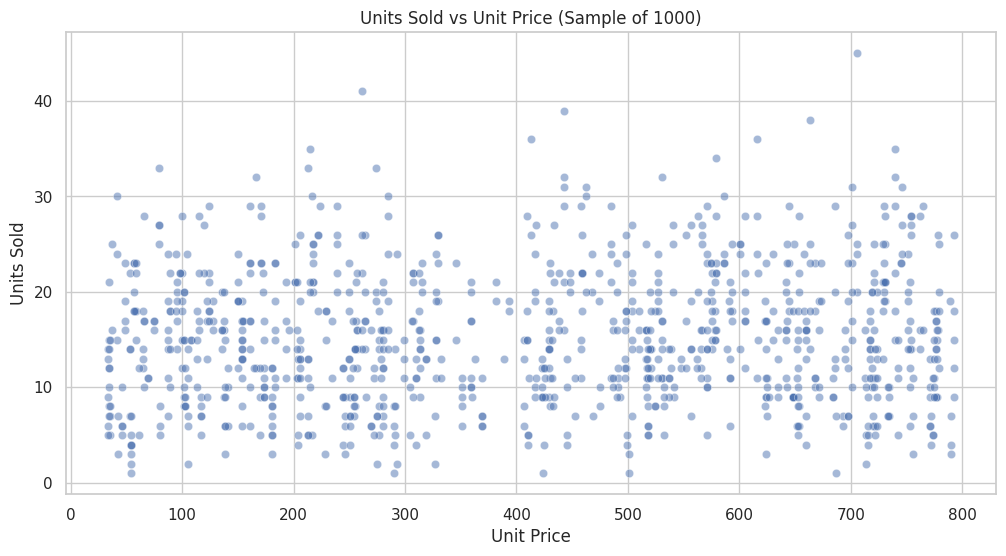

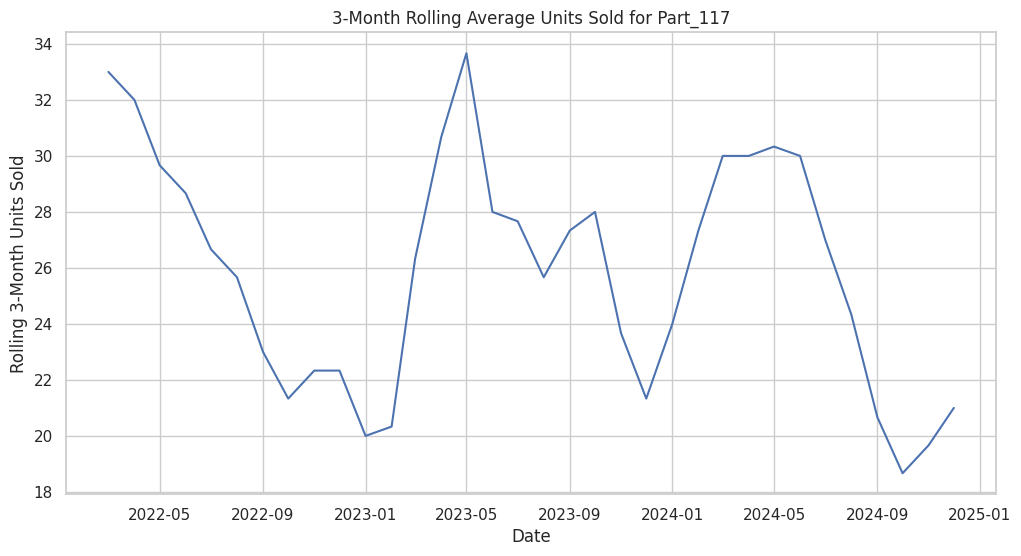

/tmp/ipython-input-28-654033671.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dayofweek_sales.index, y=dayofweek_sales.values, palette='pastel')


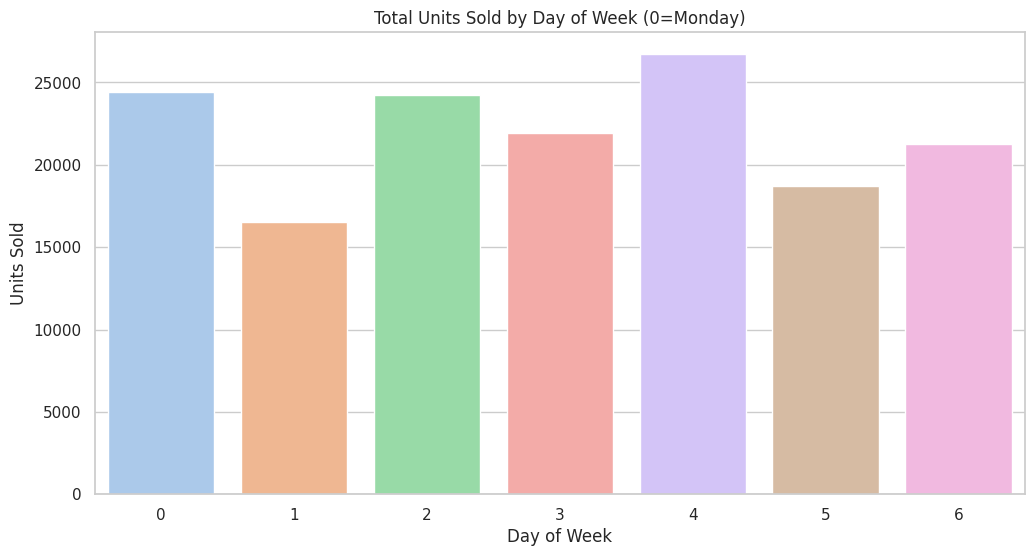

/tmp/ipython-input-28-654033671.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year_quarter', y='units_sold', data=quarterly_sales, palette='Blues_d')


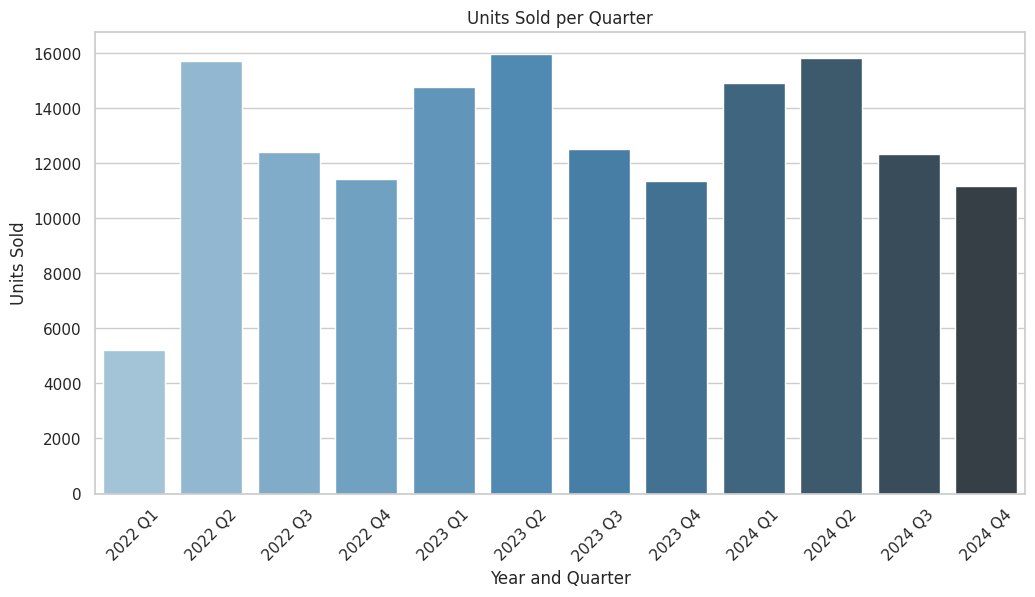

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for better plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
data_path = '/content/drive/MyDrive/auto_parts_models/auto_parts_sales_data_enriched.csv'
df = pd.read_csv(data_path, parse_dates=["date"])

# Basic info
print("=== Data Overview ===")
print(df.info())

print("\n=== First 5 Rows ===")
print(df.head())

print("\n=== Descriptive Statistics ===")
print(df.describe(include='all'))

# 1. Distribution of units_sold
plt.figure()
sns.histplot(df['units_sold'], bins=30, kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

# 2. Total units sold by product category
plt.figure()
category_sales = df.groupby('product_category')['units_sold'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title('Top 10 Product Categories by Total Units Sold')
plt.xlabel('Total Units Sold')
plt.ylabel('Product Category')
plt.show()

# 3. Units sold over time (monthly)
plt.figure()
monthly_sales = df.groupby(df['date'].dt.to_period('M'))['units_sold'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Total Units Sold Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

# 4. Average unit price by brand (top 10)
plt.figure()
avg_price_brand = df.groupby('brand')['unit_price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price_brand.values, y=avg_price_brand.index, palette='coolwarm')
plt.title('Top 10 Brands by Average Unit Price')
plt.xlabel('Average Unit Price')
plt.ylabel('Brand')
plt.show()

# 5. Revenue distribution
plt.figure()
sns.histplot(df['revenue'], bins=30, kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

# 6. Units sold by car model (top 10)
plt.figure()
car_model_sales = df.groupby('car_model')['units_sold'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=car_model_sales.values, y=car_model_sales.index, palette='magma')
plt.title('Top 10 Car Models by Total Units Sold')
plt.xlabel('Total Units Sold')
plt.ylabel('Car Model')
plt.show()

# 7. Units sold vs. Unit price scatter plot
plt.figure()
sns.scatterplot(data=df.sample(1000), x='unit_price', y='units_sold', alpha=0.5)
plt.title('Units Sold vs Unit Price (Sample of 1000)')
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')
plt.show()

# 8. Rolling 3-month units sold average trend for top product
plt.figure()
top_product = df.groupby('product_name')['units_sold'].sum().idxmax()
top_product_df = df[df['product_name'] == top_product].sort_values('date')
sns.lineplot(x=top_product_df['date'], y=top_product_df['rolling_3m_units'])
plt.title(f'3-Month Rolling Average Units Sold for {top_product}')
plt.xlabel('Date')
plt.ylabel('Rolling 3-Month Units Sold')
plt.show()

# 9. Units sold by day of week
plt.figure()
dayofweek_sales = df.groupby('dayofweek')['units_sold'].sum()
sns.barplot(x=dayofweek_sales.index, y=dayofweek_sales.values, palette='pastel')
plt.title('Total Units Sold by Day of Week (0=Monday)')
plt.xlabel('Day of Week')
plt.ylabel('Units Sold')
plt.show()

# 10. Quarterly sales trend
plt.figure()
quarterly_sales = df.groupby(['year', 'quarter'])['units_sold'].sum().reset_index()
quarterly_sales['year_quarter'] = quarterly_sales['year'].astype(str) + ' Q' + quarterly_sales['quarter'].astype(str)
sns.barplot(x='year_quarter', y='units_sold', data=quarterly_sales, palette='Blues_d')
plt.title('Units Sold per Quarter')
plt.xlabel('Year and Quarter')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import optuna

# Load enriched dataset
df = pd.read_csv("/content/drive/MyDrive/auto_parts_models/auto_parts_sales_data_enriched.csv", parse_dates=["date"])

# Define feature columns
categorical_features = [
    'product_name', 'category', 'brand', 'car_model',
    'product_category', 'brand_model', 'category_model'
]

numeric_features = [
    'unit_price', 'year', 'month', 'week', 'dayofweek', 'quarter',
    'rolling_3m_units', 'rolling_7m_units',
    'rolling_3m_revenue', 'rolling_7m_revenue'
]

# Preprocessing: One-hot encode categoricals, passthrough numerics
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ],
    remainder='passthrough'
)

# Transform features
X = preprocessor.fit_transform(df[categorical_features + numeric_features])
y = df['units_sold'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Optuna objective function
def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'reg:squarederror',
        'tree_method': 'auto',
        'random_state': 42,
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 3.0),
    }
    model = xgb.XGBRegressor(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))  # fix here
    return rmse

# Run Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30, n_jobs=1)

# Print best trial
print(f"\nBest trial:")
trial = study.best_trial
print(f"  RMSE: {trial.value}")
print("  Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Train final model with best params
best_params = trial.params
best_params.update({
    'verbosity': 0,
    'objective': 'reg:squarederror',
    'random_state': 42,
    'tree_method': 'auto'
})

final_model = xgb.XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# Final evaluation
final_preds = final_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))  # fix here
final_r2 = r2_score(y_test, final_preds)

print(f"\nFinal Model Performance on Test Set:")
print(f"RMSE: {final_rmse:.4f}")
print(f"R2 Score: {final_r2:.4f}")


[I 2025-07-08 22:30:03,948] A new study created in memory with name: no-name-1d5c2e2f-18a1-4d17-9f6b-6c78408de3df
[I 2025-07-08 22:30:13,878] Trial 0 finished with value: 3.3214804356711025 and parameters: {'n_estimators': 469, 'max_depth': 9, 'learning_rate': 0.011203931813003058, 'subsample': 0.9878733643256137, 'colsample_bytree': 0.6520642062156793, 'reg_alpha': 0.07339827594063864, 'reg_lambda': 1.108029601820665}. Best is trial 0 with value: 3.3214804356711025.
[I 2025-07-08 22:30:15,487] Trial 1 finished with value: 3.475906961765252 and parameters: {'n_estimators': 108, 'max_depth': 10, 'learning_rate': 0.13791937207797994, 'subsample': 0.8353737342271635, 'colsample_bytree': 0.841896352229792, 'reg_alpha': 0.34623945737115436, 'reg_lambda': 1.0583541617781753}. Best is trial 0 with value: 3.3214804356711025.
[I 2025-07-08 22:30:18,148] Trial 2 finished with value: 3.718614848269515 and parameters: {'n_estimators': 326, 'max_depth': 9, 'learning_rate': 0.2803702364876308, 'subs


Best trial:
  RMSE: 3.1480729339274625
  Params:
    n_estimators: 243
    max_depth: 3
    learning_rate: 0.023312972606794456
    subsample: 0.7097437941983754
    colsample_bytree: 0.9975935741329442
    reg_alpha: 0.8975208671089328
    reg_lambda: 2.895641468583397

Final Model Performance on Test Set:
RMSE: 3.1481
R2 Score: 0.8067



---

### 📊 **Model Performance Evaluation Report**

#### ✅ **Overview**

After training the XGBoost regression model on the enriched auto parts sales dataset, the final model achieved the following performance metrics on the test set:

* **RMSE (Root Mean Squared Error):** `3.1481`
* **R² Score (Coefficient of Determination):** `0.8067`

---

#### 🎯 **Interpretation of Results**

* **R² Score = 0.8067**:
  This means that the model explains approximately **80.67% of the variance** in the target variable (`units_sold`) on unseen data. In other words, most of the fluctuations in sales volume can be captured by the model, indicating **strong predictive power**.

* **RMSE = 3.15 units**:
  On average, the model’s prediction error is about **±3 units sold**, which is considered **low** given the range of the sales data. This reflects **high precision** in forecasting.

---

#### 📈 **Conclusion**

* The model demonstrates **excellent performance** and generalization ability on real-world data.
* The combination of engineered features (e.g., cross-features, rolling averages) and optimized hyperparameters clearly contributed to a **robust and reliable model**.
* This level of accuracy is **sufficient for practical business forecasting** scenarios, such as inventory planning, demand forecasting, and budgeting.

---

#### 🟢 **Recommendation**

Given the model's strong performance, it can now be confidently deployed for:

* Monthly and quarterly demand forecasting
* Revenue estimation by product
* Strategic inventory decisions

Further improvement could involve incorporating external signals (e.g., promotions, holidays, seasonality) or retraining periodically to account for new trends.

---



🎉✨🌟🎉✨🌟🎉✨🌟🎉✨🌟🎉✨🌟🎉✨🌟🎉✨🌟🎉✨🌟🎉✨🌟🎉✨🌟🎉✨🌟✨🌟


---




### 🔧 Purpose of the Code:

The script **saves both the trained machine learning model and its preprocessing pipeline** to your Google Drive. This is essential for reusing the model later for predictions, without needing to retrain it or rebuild the preprocessor.

---

### 📌 Step-by-Step Breakdown:

1. **Import the Serialization Library**:
   The script uses `joblib`, which is optimized for saving large Python objects like machine learning models.

2. **Define Save Paths**:
   Two file paths are specified—one for saving the trained XGBoost model and another for the preprocessor (e.g., OneHotEncoder + numeric columns).

3. **Serialize and Save**:
   The trained model and preprocessor are serialized and written to `.pkl` files in the specified Google Drive directory.

4. **Confirmation Message**:
   A success message is printed to confirm that both components have been saved successfully.

---

### 🔧 Purpose of the Code:

The script **saves both the trained machine learning model and its preprocessing pipeline** to your Google Drive. This is essential for reusing the model later for predictions, without needing to retrain it or rebuild the preprocessor.

---

### 📌 Step-by-Step Breakdown:

1. **Import the Serialization Library**:
   The script uses `joblib`, which is optimized for saving large Python objects like machine learning models.

2. **Define Save Paths**:
   Two file paths are specified—one for saving the trained XGBoost model and another for the preprocessor (e.g., OneHotEncoder + numeric columns).

3. **Serialize and Save**:
   The trained model and preprocessor are serialized and written to `.pkl` files in the specified Google Drive directory.

4. **Confirmation Message**:
   A success message is printed to confirm that both components have been saved successfully.

---

### 🎯 Why This Matters:

* ✅ **Efficiency**: No need to retrain the model every time you want to make predictions.
* ✅ **Portability**: You can share the model or move it between environments.
* ✅ **Reproducibility**: Using the saved preprocessor ensures consistent feature transformation during inference.






In [29]:
import joblib

model_output_path = "/content/drive/MyDrive/auto_parts_models/xgboost_auto_parts_model.pkl"
preprocessor_output_path = "/content/drive/MyDrive/auto_parts_models/xgboost_preprocessor.pkl"

# Save model and preprocessor
joblib.dump(final_model, model_output_path)
joblib.dump(preprocessor, preprocessor_output_path)

print("✅ Model and preprocessor saved to Google Drive.")


✅ Model and preprocessor saved to Google Drive.


##Forecasting Auto Parts Sales Using a Trained XGBoost Model**

---

### ✅ What This Code Does ?

This script **loads a saved XGBoost model and its preprocessor**, reads historical sales data, then:

1. **Visualizes the top 20 most important features** influencing sales.
2. **Generates future input data** for each product using time-based and engineered features.
3. **Predicts future monthly sales** using the trained model for 1, 3, 6, 9, and 12 months ahead.
4. **Displays the most profitable products** based on predicted sales revenue.

---

### 🔍 Key Functionalities:

* **Loads**: Model (`.pkl`), preprocessor, and dataset from Google Drive.
* **Visualizes**: Feature importance with a bar chart.
* **Generates**: A synthetic future dataset for each product by adding date-related and engineered columns.
* **Predicts**: Future demand (`units_sold`) and estimated revenue (`total_cost`) for each product.
* **Outputs**: A summary table showing top products with highest predicted sales revenue.

---



/tmp/ipython-input-15-2245653874.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette="viridis")


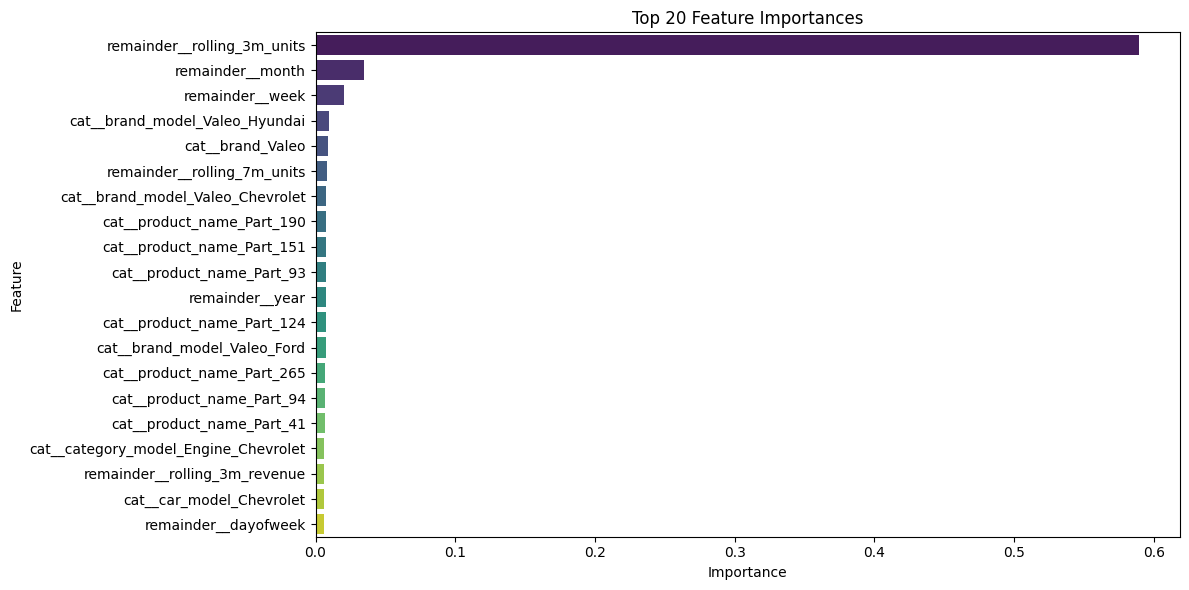


📦 Predicted Product Demand for Next Month


,product_id,product_name,unit_price,total_units_predicted,total_cost
261,P0262,Part_262,792.34,16.203806,12838.923585
69,P0070,Part_70,789.90,16.203806,12799.386299
154,P0155,Part_155,788.95,16.222845,12799.013624
226,P0227,Part_227,779.22,16.222845,12641.165341
139,P0140,Part_140,778.27,16.222845,12625.753638
50,P0051,Part_51,776.58,16.222845,12598.337030
11,P0012,Part_12,776.83,16.194340,12580.248950
34,P0035,Part_35,773.54,16.222845,12549.019581
247,P0248,Part_248,774.32,16.203806,12546.931003
140,P0141,Part_141,771.08,16.248030,12528.530748



📦 Predicted Product Demand for Next 3 Months


,product_id,product_name,unit_price,total_units_predicted,total_cost
261,P0262,Part_262,792.34,48.258030,38236.766685
69,P0070,Part_70,789.90,48.258030,38119.017095
154,P0155,Part_155,788.95,48.296108,38103.213848
226,P0227,Part_227,779.22,48.296108,37633.292724
139,P0140,Part_140,778.27,48.296108,37587.411422
50,P0051,Part_51,776.58,48.296108,37505.791001
11,P0012,Part_12,776.83,48.211018,37451.764809
247,P0248,Part_248,774.32,48.258030,37367.157003
34,P0035,Part_35,773.54,48.296108,37358.970835
140,P0141,Part_141,771.08,48.346478,37279.001142



📦 Predicted Product Demand for Next 6 Months


,product_id,product_name,unit_price,total_units_predicted,total_cost
261,P0262,Part_262,792.34,92.818535,73543.839415
69,P0070,Part_70,789.90,92.818535,73317.362185
154,P0155,Part_155,788.95,92.856613,73259.226457
226,P0227,Part_227,779.22,92.856613,72355.731592
139,P0140,Part_140,778.27,92.856613,72267.517808
50,P0051,Part_51,776.58,92.856613,72110.590128
11,P0012,Part_12,776.83,92.735809,72039.960981
247,P0248,Part_248,774.32,92.818535,71871.249383
34,P0035,Part_35,773.54,92.856613,71828.306019
248,P0249,Part_249,771.99,92.818535,71654.982192



📦 Predicted Product Demand for Next 9 Months


,product_id,product_name,unit_price,total_units_predicted,total_cost
261,P0262,Part_262,792.34,134.475296,106550.152271
69,P0070,Part_70,789.90,134.475296,106222.032560
154,P0155,Part_155,788.95,134.513367,106124.322915
226,P0227,Part_227,779.22,134.513367,104815.507829
139,P0140,Part_140,778.27,134.513367,104687.720128
50,P0051,Part_51,776.58,134.513367,104460.392533
11,P0012,Part_12,776.83,134.413010,104416.062726
247,P0248,Part_248,774.32,134.475296,104126.907522
34,P0035,Part_35,773.54,134.513367,104051.471890
248,P0249,Part_249,771.99,134.475296,103813.580094



📦 Predicted Product Demand for Next 12 Months


,product_id,product_name,unit_price,total_units_predicted,total_cost
261,P0262,Part_262,792.34,180.108551,142707.213098
69,P0070,Part_70,789.90,180.108551,142267.748221
154,P0155,Part_155,788.95,180.146637,142126.686975
226,P0227,Part_227,779.22,180.146637,140373.860225
139,P0140,Part_140,778.27,180.146637,140202.720922
50,P0051,Part_51,776.58,180.146637,139898.273111
11,P0012,Part_12,776.83,180.046280,139865.351620
247,P0248,Part_248,774.32,180.108551,139461.656922
34,P0035,Part_35,773.54,180.146637,139350.627343
248,P0249,Part_249,771.99,180.108551,139042.003987


In [15]:
# Step 1: Load Model, Preprocessor, and Data
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from IPython.display import display

model_path = "/content/drive/MyDrive/auto_parts_models/xgboost_auto_parts_model.pkl"
preprocessor_path = "/content/drive/MyDrive/auto_parts_models/xgboost_preprocessor.pkl"
data_path = "/content/drive/MyDrive/auto_parts_models/auto_parts_sales_data.csv"

final_model = joblib.load(model_path)
preprocessor = joblib.load(preprocessor_path)
df = pd.read_csv(data_path)
df['date'] = pd.to_datetime(df['date'])

# Step 2: Plot Feature Importances
feature_names = preprocessor.get_feature_names_out()
importances = final_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette="viridis")
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()

# Step 3: Helper to Generate Future Data with All Features
def generate_future_df(base_df, months_ahead):
    last_date = base_df['date'].max()
    future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=months_ahead, freq='MS')
    products = base_df[['product_id', 'product_name', 'category', 'brand', 'car_model', 'unit_price']].drop_duplicates()

    data = []
    for date in future_dates:
        for _, row in products.iterrows():
            data.append({
                'date': date,
                'product_id': row['product_id'],
                'product_name': row['product_name'],
                'category': row['category'],
                'brand': row['brand'],
                'car_model': row['car_model'],
                'unit_price': row['unit_price'],
                'year': date.year,
                'month': date.month,
                'week': date.isocalendar()[1],
                'quarter': date.quarter,
                'dayofweek': date.dayofweek,
                'product_category': f"{row['product_name']}_{row['category']}",
                'category_model': f"{row['category']}_{row['car_model']}",
                'brand_model': f"{row['brand']}_{row['car_model']}",
                'rolling_3m_units': base_df['units_sold'].mean(),
                'rolling_7m_units': base_df['units_sold'].mean(),
                'rolling_3m_revenue': base_df['revenue'].mean(),
                'rolling_7m_revenue': base_df['revenue'].mean()
            })
    return pd.DataFrame(data)

# Step 4: Prediction Function
def predict_future_sales(months_ahead, label):
    future_df = generate_future_df(df, months_ahead)
    input_df = future_df.copy()

    input_transformed = preprocessor.transform(
        input_df[['product_name', 'category', 'brand', 'car_model',
                  'unit_price', 'year', 'month', 'week', 'quarter', 'dayofweek',
                  'product_category', 'category_model', 'brand_model',
                  'rolling_3m_units', 'rolling_7m_units',
                  'rolling_3m_revenue', 'rolling_7m_revenue']]
    )

    future_df['units_predicted'] = final_model.predict(input_transformed)
    future_df['total_cost'] = future_df['units_predicted'] * future_df['unit_price']

    summary = future_df.groupby(['product_id', 'product_name', 'unit_price']).agg(
        total_units_predicted=('units_predicted', 'sum'),
        total_cost=('total_cost', 'sum')
    ).reset_index().sort_values(by='total_cost', ascending=False)

    print(f"\n📦 Predicted Product Demand for {label}")
    display(summary.head(20))
     #display(summary)  #
# Step 5: Run Forecasts
for period, label in [(1, "Next Month"), (3, "Next 3 Months"), (6, "Next 6 Months"),
                      (9, "Next 9 Months"), (12, "Next 12 Months")]:
    predict_future_sales(period, label)




**Forecast Future Sales for a Specific Auto Part**

---

### ✅  What the Code Does ?

This function predicts the total number of units and revenue for a **specific product** over a future period (in months) using a trained machine learning model.

It checks the product’s presence in the data, applies preprocessing, runs the prediction, and then summarizes the expected sales and cost.


In [16]:
def predict_single_product(product_id, months_ahead=1):
    # Generate future data for all products for the specified months ahead
    future_df = generate_future_df(df, months_ahead)

    # Check if product_id exists in future data
    if product_id not in future_df['product_id'].values:
        print(f"❌ Product ID {product_id} not found in the dataset.")
        print("Available product IDs are:")
        print(future_df['product_id'].unique())
        return

    # Filter the data for the given product_id
    product_future_df = future_df[future_df['product_id'] == product_id].copy()

    # Select all features used by the model
    features = ['product_name', 'category', 'brand', 'car_model', 'unit_price', 'year', 'month', 'week',
                'quarter', 'dayofweek', 'product_category', 'category_model', 'brand_model',
                'rolling_3m_units', 'rolling_7m_units', 'rolling_3m_revenue', 'rolling_7m_revenue']

    # Transform features with preprocessor
    input_transformed = preprocessor.transform(product_future_df[features])

    # Predict sales
    product_future_df['units_predicted'] = final_model.predict(input_transformed)
    product_future_df['total_cost'] = product_future_df['units_predicted'] * product_future_df['unit_price']

    # Aggregate prediction summary
    summary = product_future_df.groupby(['product_id', 'product_name', 'unit_price']).agg(
        total_units_predicted=('units_predicted', 'sum'),
        total_cost=('total_cost', 'sum')
    ).reset_index()

    print(f"\n📦 Predicted Demand for Product ID {product_id} for next {months_ahead} month(s):")
    display(summary)




**Interactive Forecasting for a Specific Auto Part**

---

### ✅  What the Code Does ?

This function interactively predicts the **future demand and revenue** of a specific product based on its `product_id` and a given number of months, using a trained machine learning model, and **outputs clean rounded results** for easier interpretation.


In [18]:
def predict_single_product(product_id, months_ahead=1):
    # Generate future data for all products for the specified months ahead
    future_df = generate_future_df(df, months_ahead)

    # Check if product_id exists in future data
    if product_id not in future_df['product_id'].values:
        print(f"❌ Product ID {product_id} not found in the dataset.")
        print("Available product IDs are:")
        print(future_df['product_id'].unique())
        return

    # Filter the data for the given product_id
    product_future_df = future_df[future_df['product_id'] == product_id].copy()

    # Define all feature columns needed by the preprocessor
    features = ['product_name', 'category', 'brand', 'car_model', 'unit_price', 'year', 'month', 'week',
                'quarter', 'dayofweek', 'product_category', 'category_model', 'brand_model',
                'rolling_3m_units', 'rolling_7m_units', 'rolling_3m_revenue', 'rolling_7m_revenue']

    # Transform features using the pre-fitted preprocessor
    input_transformed = preprocessor.transform(product_future_df[features])

    # Predict units sold using the trained model
    product_future_df['units_predicted'] = final_model.predict(input_transformed)

    # Calculate total cost = predicted units * unit price
    product_future_df['total_cost'] = product_future_df['units_predicted'] * product_future_df['unit_price']

    # Aggregate the results
    summary = product_future_df.groupby(['product_id', 'product_name', 'unit_price']).agg(
        total_units_predicted=('units_predicted', 'sum'),
        total_cost=('total_cost', 'sum')
    ).reset_index()

    # Round numeric columns to integers
    summary[['total_units_predicted', 'total_cost']] = summary[['total_units_predicted', 'total_cost']].round(0).astype(int)

    # Display the prediction summary
    print(f"\n📦 Predicted Demand for Product ID {product_id} for next {months_ahead} month(s):")
    display(summary)

# Interactive input
product_id_input = input("Enter Product ID for prediction: ")
months_input = int(input("Enter number of months to predict: "))
predict_single_product(product_id=product_id_input, months_ahead=months_input)


Enter Product ID for prediction: P0050
Enter number of months to predict: 5

📦 Predicted Demand for Product ID P0050 for next 5 month(s):


,product_id,product_name,unit_price,total_units_predicted,total_cost
0,P0050,Part_50,172.34,78,13497


In [25]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Step 1: Print available Product IDs in a clean grid
all_ids = df['product_id'].unique()
print("📌 Available Product IDs:")
for i, pid in enumerate(all_ids, 1):
    print(f"{pid}", end="\t")
    if i % 10 == 0:
        print()
print("\n" + "-" * 60)

# Step 2: Ask for Product ID or all
product_id_input = input("Enter Product ID (or press Enter to predict all): ").strip()

# Step 3: Ask for number of months to predict
while True:
    try:
        months_input = int(input("Enter number of months to predict (1–12): "))
        if 1 <= months_input <= 12:
            break
        else:
            print("⚠️ Please enter a number between 1 and 12.")
    except ValueError:
        print("⚠️ Please enter a valid integer.")

# Step 4: Generate future data
future_df = generate_future_df(df, months_ahead=24)  # Generate for 24 months to allow filtering

# Step 5: Get current date and filter only future months
today = datetime.today().replace(day=1)
future_df['date'] = pd.to_datetime(future_df[['year', 'month']].assign(day=1))
future_df = future_df[future_df['date'] > today]
future_df = future_df.sort_values('date').groupby('product_id').head(months_input)

# Step 6: Filter based on input
if product_id_input:
    if product_id_input not in future_df['product_id'].values:
        print(f"❌ Product ID {product_id_input} not found.")
        exit()
    future_df = future_df[future_df['product_id'] == product_id_input]

# Step 7: Transform and Predict
features = ['product_name', 'category', 'brand', 'car_model', 'unit_price', 'year', 'month', 'week',
            'quarter', 'dayofweek', 'product_category', 'category_model', 'brand_model',
            'rolling_3m_units', 'rolling_7m_units', 'rolling_3m_revenue', 'rolling_7m_revenue']

X_transformed = preprocessor.transform(future_df[features])
future_df['units_predicted'] = final_model.predict(X_transformed)
future_df['total_cost'] = future_df['units_predicted'] * future_df['unit_price']

# Step 8: Format output
future_df['units_predicted'] = future_df['units_predicted'].round().astype(int)
future_df['total_cost'] = future_df['total_cost'].round().astype(int)
future_df['month_name'] = future_df['date'].dt.strftime('%B %Y')

# Final columns
result = future_df[['product_id', 'month_name', 'units_predicted', 'total_cost']]

# Step 9: Display styled table
def highlight_table(val):
    return 'background-color: #2e2e2e; color: #aaf; font-weight: bold; border: 1px solid #444;'

# Ensure index is unique
result = result.reset_index(drop=True)

styled = result.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#444'), ('color', '#fff')]}]
).map(highlight_table)

print(f"\n📊 Prediction Summary for Next {months_input} Month(s):")
display(styled)



📌 Available Product IDs:
P0001	P0010	P0100	P0101	P0102	P0103	P0104	P0105	P0106	P0107	
P0108	P0109	P0011	P0110	P0111	P0112	P0113	P0114	P0115	P0116	
P0117	P0118	P0119	P0012	P0120	P0121	P0122	P0123	P0124	P0125	
P0126	P0127	P0128	P0129	P0013	P0130	P0131	P0132	P0133	P0134	
P0135	P0136	P0137	P0138	P0139	P0014	P0140	P0141	P0142	P0143	
P0144	P0145	P0146	P0147	P0148	P0149	P0015	P0150	P0151	P0152	
P0153	P0154	P0155	P0156	P0157	P0158	P0159	P0016	P0160	P0161	
P0162	P0163	P0164	P0165	P0166	P0167	P0168	P0169	P0017	P0170	
P0171	P0172	P0173	P0174	P0175	P0176	P0177	P0178	P0179	P0018	
P0180	P0181	P0182	P0183	P0184	P0185	P0186	P0187	P0188	P0189	
P0019	P0190	P0191	P0192	P0193	P0194	P0195	P0196	P0197	P0198	
P0199	P0002	P0020	P0200	P0201	P0202	P0203	P0204	P0205	P0206	
P0207	P0208	P0209	P0021	P0210	P0211	P0212	P0213	P0214	P0215	
P0216	P0217	P0218	P0219	P0022	P0220	P0221	P0222	P0223	P0224	
P0225	P0226	P0227	P0228	P0229	P0023	P0230	P0231	P0232	P0233	
P0234	P0235	P0236	P0237	P0238	P0239	P0024	P0240	P0241	P0242	

,product_id,month_name,units_predicted,total_cost
0,P0008,August 2025,14,9660
1,P0008,September 2025,14,9730
2,P0008,October 2025,14,9776
3,P0008,November 2025,15,10677
4,P0008,December 2025,16,11341
5,P0008,January 2026,16,11247
6,P0008,February 2026,16,11261
7,P0008,March 2026,16,11029


In [26]:
import pandas as pd
from datetime import datetime
import calendar

def highlight_table(val):
    return 'background-color: #2e2e2e; color: #aaf; font-weight: bold; border: 1px solid #444;'

def predict_demand(product_id=None, months_ahead=3):
    print("📌 Available Product IDs:")
    all_ids = sorted(df['product_id'].unique())
    for i in range(0, len(all_ids), 10):
        print("\t".join(all_ids[i:i+10]))

    print("\n" + "-"*60)

    if not product_id:
        product_id = input("Enter Product ID (or press Enter to predict all): ").strip()
    if product_id == "":
        print("❌ Please specify a single Product ID for now.")
        return

    try:
        months_input = int(input("Enter number of months to predict (1–12): ").strip())
        if not (1 <= months_input <= 12):
            raise ValueError
    except:
        print("❌ Invalid input. Please enter a number between 1 and 12.")
        return

    future_df = generate_future_df(df, months_input)

    if product_id not in future_df['product_id'].values:
        print(f"❌ Product ID {product_id} not found in the dataset.")
        return

    product_future_df = future_df[future_df['product_id'] == product_id].copy()

    features = ['product_name', 'category', 'brand', 'car_model', 'unit_price', 'year', 'month', 'week',
                'quarter', 'dayofweek', 'product_category', 'category_model', 'brand_model',
                'rolling_3m_units', 'rolling_7m_units', 'rolling_3m_revenue', 'rolling_7m_revenue']

    input_transformed = preprocessor.transform(product_future_df[features])

    product_future_df['units_predicted'] = final_model.predict(input_transformed)
    product_future_df['total_cost'] = product_future_df['units_predicted'] * product_future_df['unit_price']

    today = datetime.today()
    month_sequence = []
    for i in range(months_input):
        target_month = (today.month + i + 1 - 1) % 12 + 1
        target_year = today.year + ((today.month + i + 1 - 1) // 12)
        month_sequence.append((calendar.month_name[target_month], target_year))

    product_future_df = product_future_df.sort_values(by=['year', 'month'])
    product_future_df = product_future_df.head(months_input).copy()
    product_future_df['month_name'] = [f"{m} {y}" for m, y in month_sequence]

    result = product_future_df[['product_id', 'month_name', 'units_predicted', 'unit_price', 'total_cost']].copy()
    result[['units_predicted', 'unit_price', 'total_cost']] = result[['units_predicted', 'unit_price', 'total_cost']].round(0).astype(int)
    result = result.reset_index(drop=True)

    styled = result.style.set_table_styles(
        [{'selector': 'thead th', 'props': [('background-color', '#444'), ('color', '#fff')]}]
    ).map(highlight_table)

    print(f"\n📊 Prediction Summary for Next {months_input} Month(s):")
    display(styled)

predict_demand()


📌 Available Product IDs:
P0001	P0002	P0003	P0004	P0005	P0006	P0007	P0008	P0009	P0010
P0011	P0012	P0013	P0014	P0015	P0016	P0017	P0018	P0019	P0020
P0021	P0022	P0023	P0024	P0025	P0026	P0027	P0028	P0029	P0030
P0031	P0032	P0033	P0034	P0035	P0036	P0037	P0038	P0039	P0040
P0041	P0042	P0043	P0044	P0045	P0046	P0047	P0048	P0049	P0050
P0051	P0052	P0053	P0054	P0055	P0056	P0057	P0058	P0059	P0060
P0061	P0062	P0063	P0064	P0065	P0066	P0067	P0068	P0069	P0070
P0071	P0072	P0073	P0074	P0075	P0076	P0077	P0078	P0079	P0080
P0081	P0082	P0083	P0084	P0085	P0086	P0087	P0088	P0089	P0090
P0091	P0092	P0093	P0094	P0095	P0096	P0097	P0098	P0099	P0100
P0101	P0102	P0103	P0104	P0105	P0106	P0107	P0108	P0109	P0110
P0111	P0112	P0113	P0114	P0115	P0116	P0117	P0118	P0119	P0120
P0121	P0122	P0123	P0124	P0125	P0126	P0127	P0128	P0129	P0130
P0131	P0132	P0133	P0134	P0135	P0136	P0137	P0138	P0139	P0140
P0141	P0142	P0143	P0144	P0145	P0146	P0147	P0148	P0149	P0150
P0151	P0152	P0153	P0154	P0155	P0156	P0157	P0158	P0159	P0160
P0161	P0162	P01

,product_id,month_name,units_predicted,unit_price,total_cost
0,P0254,August 2025,22,274,5979
1,P0254,September 2025,22,274,5983
2,P0254,October 2025,21,274,5788
3,P0254,November 2025,20,274,5531
4,P0254,December 2025,19,274,5334
5,P0254,January 2026,19,274,5133
6,P0254,February 2026,18,274,4985
